<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/ARIMA_LSTM_SVM_RF_CNN_RL_16_June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print (keras.__version__)

2.8.0


In [1]:
## Importing the Necessaaary Libraries
!pip install arch
import tensorflow
import glob
import csv
import os
from pathlib import Path
import pandas as pd
from arch import arch_model

## Checkning the business day's 

from pandas.tseries.offsets import BDay

# supresses future warnings 

import warnings                                                 
warnings.simplefilter(action='ignore')

# importing Datetime for timeseries data

import datetime as dt
from datetime import datetime, timedelta

# Importing Maplotlib for Visualiztion

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Importing Math and Numpy for Calculations

import math
from math import sqrt

import numpy as np
from numpy import zeros, ones, expand_dims, asarray
from numpy.random import randn, randint

## Importing Statsmodel for Arima 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Importing Keras and its functions

import keras
from keras.models import Sequential
from keras.layers import LSTM
from tensorflow.python.keras.optimizer_v2 import adam
from keras.models import Model, load_model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Conv2D, Conv2DTranspose, Concatenate
from keras.layers import LeakyReLU, Dropout, Embedding
from keras.layers import BatchNormalization, Activation
from keras import initializers
from keras.initializers import RandomNormal
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv1D   
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

## Importing Sklearn and its functions 

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import layers

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Bidirectional, LSTM, Reshape, RepeatVector, TimeDistributed
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 902 kB 15.9 MB/s 
     |████████████████████████████████| 9.8 MB 57.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/PhD research/VIX_daily.xlsx" #importing dataset

In [4]:
df=pd.read_excel("/content/drive/MyDrive/PhD research/VIX_daily.xlsx", index_col = 'Date')
             #  parse_dates=["Date"],
             #  index_col=["Date"]) # parse the date column and tell pandas that column 1 is a datetime)

In [ ]:
#path = "/content/drive/MyDrive/PhD research/VIX daily.xlsx"

In [5]:
#printing overview of dataset
df

,Last Price
Date,
2022-04-20,21.19
2022-04-19,21.37
2022-04-18,22.17
2022-04-14,22.70
2022-04-13,21.82
...,...
1990-01-08,20.26
1990-01-05,20.11
1990-01-04,19.22


In [6]:
df.isnull().any()

Last Price    False
dtype: bool

In [7]:
df.info() #printing the statistics of dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8136 entries, 2022-04-20 to 1990-01-02
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Last Price  8136 non-null   float64
dtypes: float64(1)
memory usage: 127.1 KB


In [8]:
len(df) #length

8136

In [9]:
df.index

DatetimeIndex(['2022-04-20', '2022-04-19', '2022-04-18', '2022-04-14',
               '2022-04-13', '2022-04-12', '2022-04-11', '2022-04-08',
               '2022-04-07', '2022-04-06',
               ...
               '1990-01-15', '1990-01-12', '1990-01-11', '1990-01-10',
               '1990-01-09', '1990-01-08', '1990-01-05', '1990-01-04',
               '1990-01-03', '1990-01-02'],
              dtype='datetime64[ns]', name='Date', length=8136, freq=None)

In [10]:
## Checkning the business day's in the dataframe

from pandas.tseries.offsets import BDay

isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(df.index).map(isBusinessDay)
match_series

Index([True, True, True, True, True, True, True, True, True, True,
       ...
       True, True, True, True, True, True, True, True, True, True],
      dtype='object', name='Date', length=8136)

In [ ]:
#VIX_daily['Date'] = (VIX_daily['Date'].apply(lambda x: float(x[0].replace(',', ''))))

In [ ]:
#df.dropna()

In [ ]:
#df['Date'] = pd.to_datetime(VIX_daily['Date'], errors='coerce', utc= True)

In [11]:
df.index.dayofweek.nunique() #printing the number of unique value according to the data of week
#dataset containes only the week days

5

In [ ]:
#VIX_daily.shape

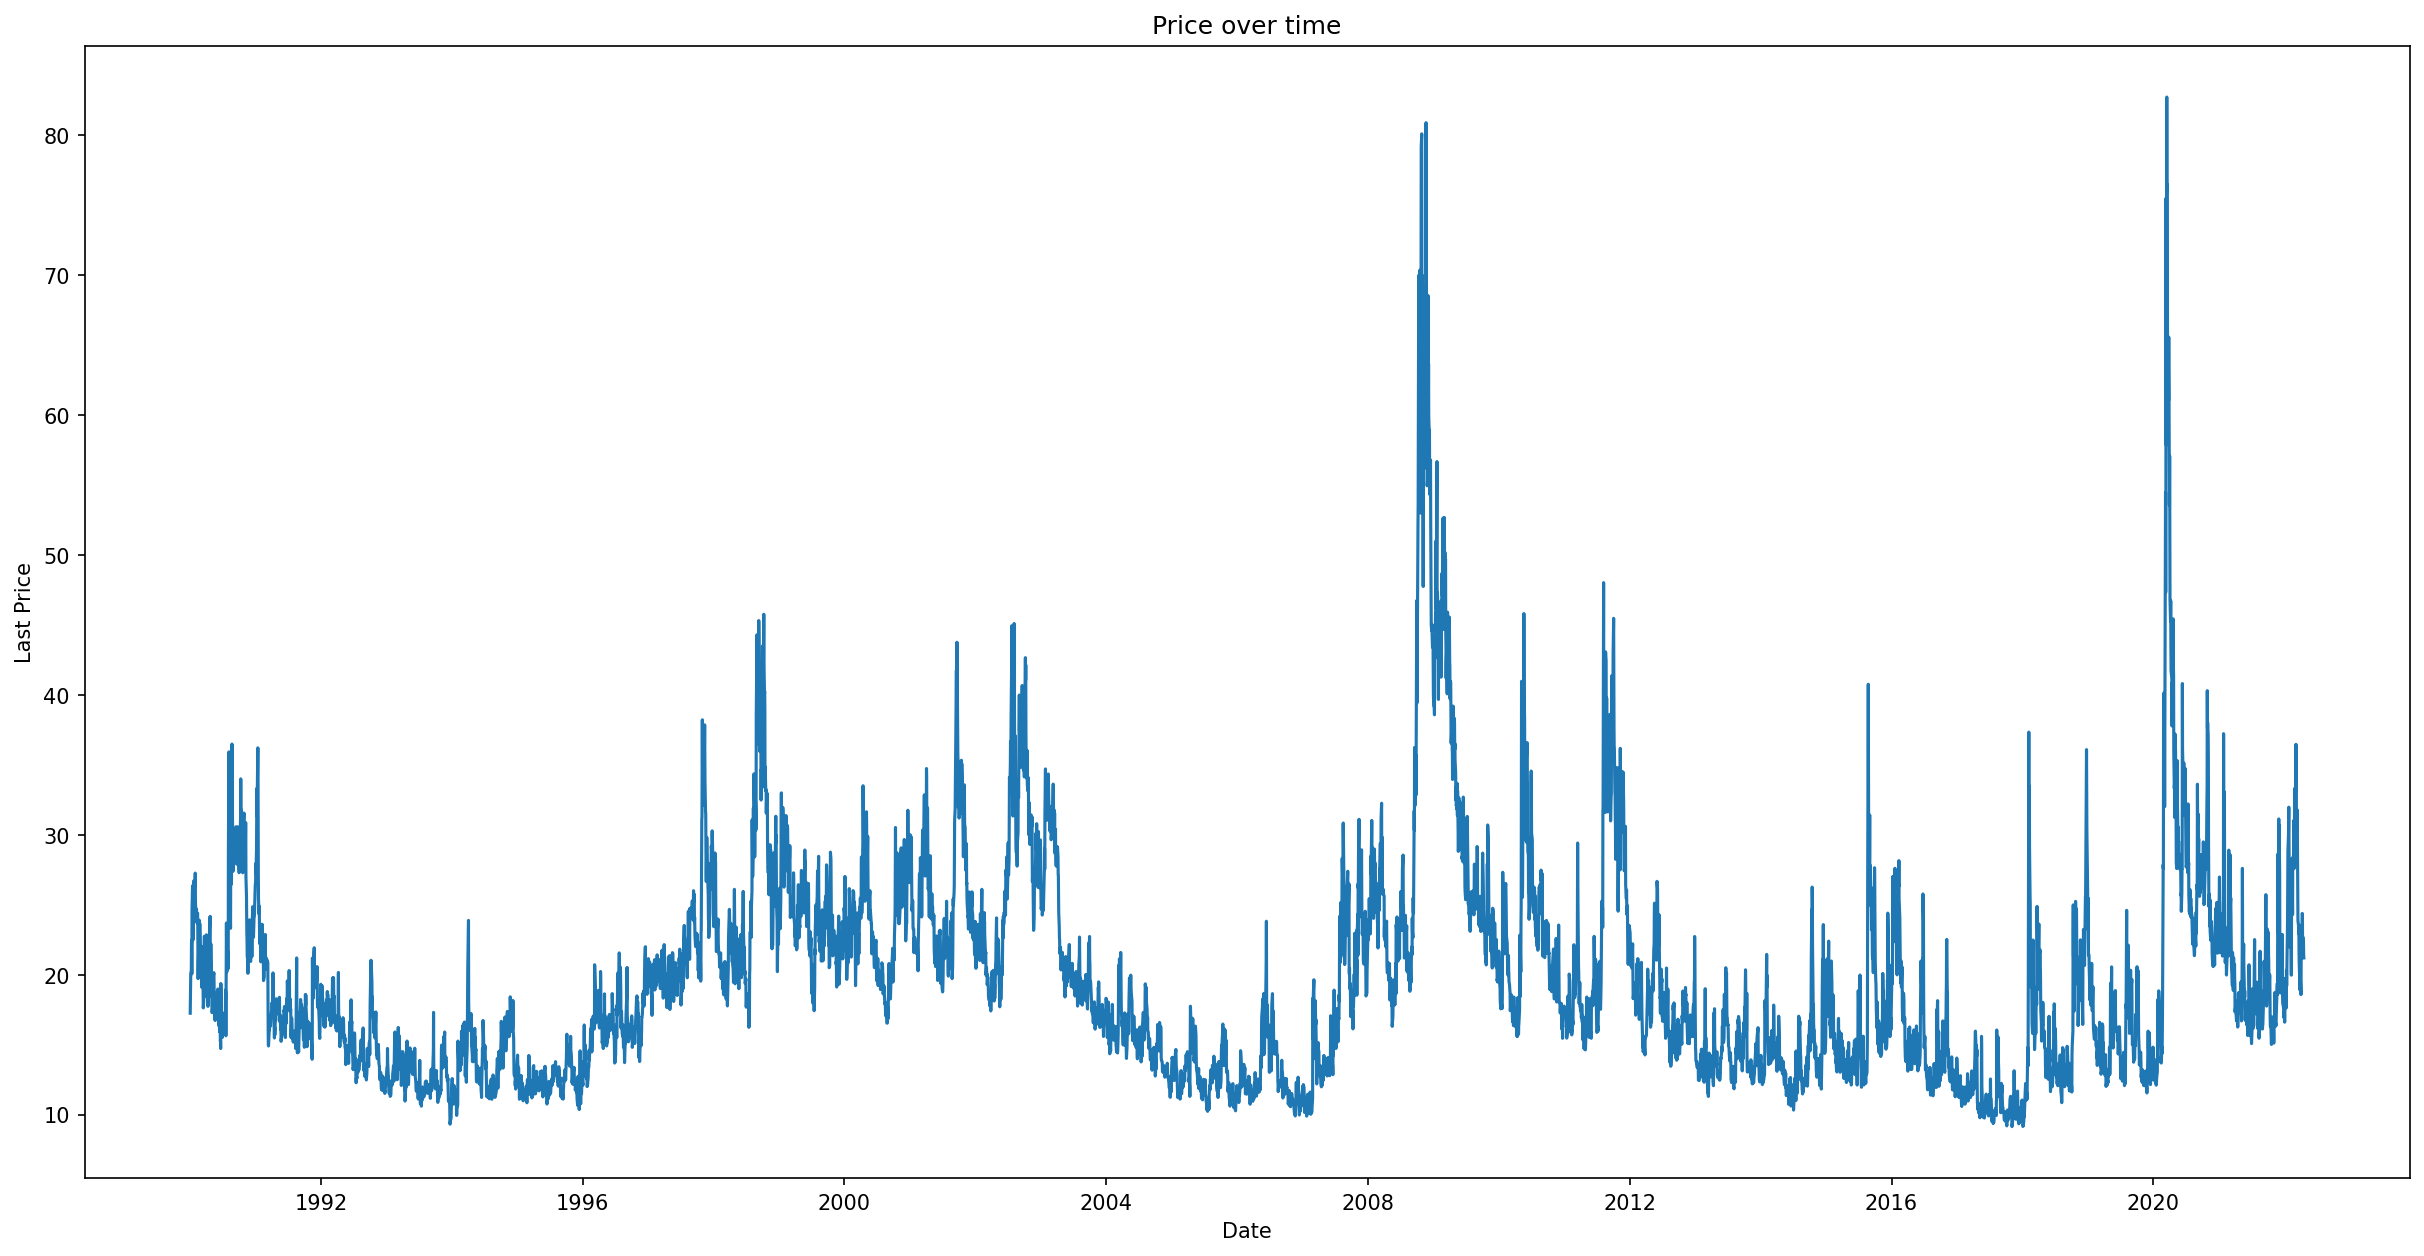

In [12]:
plt.figure(figsize=(20, 10), dpi=150) #plotting time series to check frequency and trend
plt.plot(df.index, df['Last Price'], color='tab:blue')
plt.gca().set(title='Price over time', 
xlabel='Date', ylabel='Last Price')
plt.show()

In [13]:
#Determine rolling statistics
rolmean = df['Last Price'].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df['Last Price'].rolling(window=12).std()
print(rolmean,rolstd)

Date
2022-04-20          NaN
2022-04-19          NaN
2022-04-18          NaN
2022-04-14          NaN
2022-04-13          NaN
                ...    
1990-01-08    23.544167
1990-01-05    23.160000
1990-01-04    22.536667
1990-01-03    22.177500
1990-01-02    21.585833
Name: Last Price, Length: 8136, dtype: float64 Date
2022-04-20         NaN
2022-04-19         NaN
2022-04-18         NaN
2022-04-14         NaN
2022-04-13         NaN
                ...   
1990-01-08    2.108155
1990-01-05    2.286868
1990-01-04    2.253419
1990-01-03    2.579659
1990-01-02    2.839697
Name: Last Price, Length: 8136, dtype: float64


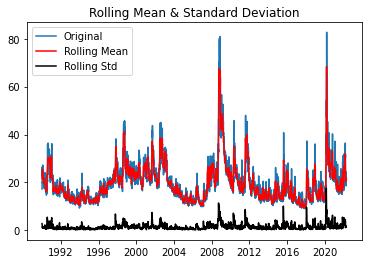

In [14]:
#Plot rolling statistics
import matplotlib.pyplot as plt
import numpy as np
orig = plt.plot(df, color='tab:blue', label= 'Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Plot rolling statistics
#orig = plt.plot(VIX_daily['Date'], VIX_daily['Last Price'], color='tab:blue')

In [15]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['Last Price'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -6.711864e+00
p-value                        3.663477e-09
#Lags Used                     1.000000e+01
Number of Observations Used    8.125000e+03
Critical Value (1%)           -3.431155e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566959e+00
dtype: float64


p-value is the probability. should be smaller than 0.05. 

In [16]:
#Estimating trend/ taking logs of data series

Dataset_logScale = np.log(df['Last Price'])
Dataset_logScale = Dataset_logScale.dropna()
Dataset_logScale

Date
2022-04-20    3.053529
2022-04-19    3.061988
2022-04-18    3.098740
2022-04-14    3.122365
2022-04-13    3.082827
                ...   
1990-01-08    3.008648
1990-01-05    3.001217
1990-01-04    2.955951
1990-01-03    2.900872
1990-01-02    2.847232
Name: Last Price, Length: 8136, dtype: float64

In [17]:
## Calculating Log Return on Log-Scale

Log_Return= Dataset_logScale.pct_change()

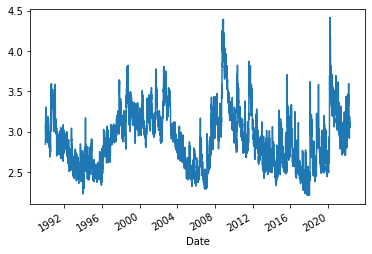

In [18]:
Dataset_logScale.plot()

In [19]:
#Log difference/ returns 
Log_Return= df['Last Price'].pct_change()
Log_Return = Log_Return.dropna()
Log_Return

Date
2022-04-19    0.008495
2022-04-18    0.037436
2022-04-14    0.023906
2022-04-13   -0.038767
2022-04-12    0.111824
                ...   
1990-01-08   -0.087387
1990-01-05   -0.007404
1990-01-04   -0.044257
1990-01-03   -0.053590
1990-01-02   -0.052226
Name: Last Price, Length: 8135, dtype: float64

LogScale Data

In [20]:
# copy the data and Normalise it
df_min_max_scaled = Dataset_logScale.copy()

# apply normalization techniques on logged data
for i in df_min_max_scaled:
    df_min_max_scaled  = (df_min_max_scaled  - df_min_max_scaled .min()) / (df_min_max_scaled .max() - df_min_max_scaled .min())

# view normalized data
print(df_min_max_scaled)

Date
2022-04-20    0.381790
2022-04-19    0.385631
2022-04-18    0.402318
2022-04-14    0.413044
2022-04-13    0.395092
                ...   
1990-01-08    0.361412
1990-01-05    0.358038
1990-01-04    0.337486
1990-01-03    0.312477
1990-01-02    0.288122
Name: Last Price, Length: 8136, dtype: float64


In [21]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.6 MB/s 


auto

## On Normal Data Value

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data.The AIC function is 2K – 2(log-likelihood) = 2*(K - LL). Lower AIC values indicate a better-fit model. 
BIC = ln(n)k - 2l. https://www.roadlesstraveledstore.com/how-do-i-choose-between-aic-and-bic/.
k = number of variables or input features or columns in the model. k is the numner of parameters estimated. 


In [22]:
#data shape
print(df_min_max_scaled.shape)

#making the train and test split

train=df_min_max_scaled.iloc[:-30]
test=df_min_max_scaled.iloc[-30:]

#print the data shape
print(train.shape, test.shape)
print(test.iloc[0],test.iloc[-1])

(8136,)
(8106,) (30,)
0.44546207851647696 0.2881224334745227


In [ ]:
#ARIMA MODEL

In [23]:
model = ARIMA(train, order = (1, 0, 5))  #fit arima on train data
model = model.fit()  

In [24]:
model.summary() # print summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Last Price   No. Observations:                 8106
Model:                 ARIMA(1, 0, 5)   Log Likelihood               16858.285
Date:                Fri, 17 Jun 2022   AIC                         -33700.571
Time:                        10:04:09   BIC                         -33644.568
Sample:                             0   HQIC                        -33681.415
                               - 8106                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3152      0.026     12.163      0.000       0.264       0.366
ar.L1          0.9897      0.001    670.901      0.000       0.987       0.993
ma.L1         -0.0955      0.007    -12.910      0.000      -0.110      -0.081
ma.L2         -0.0628      0.008     -7.972      0.000      -0.078      -0.047
ma.L3         -0.0397      0.009     -4.666      0.000      -0.056      -0.023
ma.L4         -0.0475      0.009     -5.389      0.000      -0.065      -0.030
ma.L5         -0.0220      0.008     -2.602      0.009      -0.039      -0.005
sigma2         0.0009   8.13e-06    112.342      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11602.49
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
data = model.fittedvalues #print the fitted values (predicted values)
data  

Date
2022-04-20    0.315159
2022-04-19    0.380511
2022-04-18    0.384087
2022-04-14    0.399271
2022-04-13    0.409386
                ...   
1990-02-20    0.431740
1990-02-16    0.413379
1990-02-15    0.376839
1990-02-14    0.353521
1990-02-13    0.398110
Length: 8106, dtype: float64

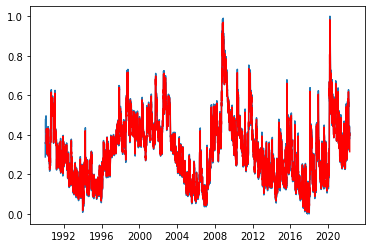

In [26]:
# plotting actual vs predict 
plt.plot(df_min_max_scaled)
plt.plot(model.fittedvalues, color='red')

In [27]:
predictions_ARIMA_diff = pd.Series(model.fittedvalues) #calculating the difference
print(predictions_ARIMA_diff)

Date
2022-04-20    0.315159
2022-04-19    0.380511
2022-04-18    0.384087
2022-04-14    0.399271
2022-04-13    0.409386
                ...   
1990-02-20    0.431740
1990-02-16    0.413379
1990-02-15    0.376839
1990-02-14    0.353521
1990-02-13    0.398110
Length: 8106, dtype: float64


In [28]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() # convert to cumul. sum
print(predictions_ARIMA_diff_cumsum)
 

Date
2022-04-20       0.315159
2022-04-19       0.695670
2022-04-18       1.079758
2022-04-14       1.479029
2022-04-13       1.888415
                 ...     
1990-02-20    2544.710788
1990-02-16    2545.124167
1990-02-15    2545.501006
1990-02-14    2545.854528
1990-02-13    2546.252638
Length: 8106, dtype: float64


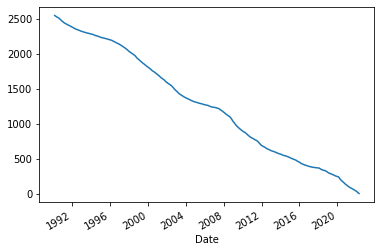

In [29]:
# plotting the predictive plot to check the overall future trend

predictions_ARIMA_log = pd.Series(df_min_max_scaled, index=df_min_max_scaled.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum)
predictions_ARIMA_log.plot()

In [30]:
start=len(train) 
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start=start,end=end)
pred=model.predict(start=start,end=end ).rename('ARIMA predictions')

In [31]:
## MAking a data frame of Predicted Values

final_data = pd.DataFrame(data, columns=['Price'])

In [32]:
## Printing the OVerview of dataset

final_data

,Price
Date,
2022-04-20,0.315159
2022-04-19,0.380511
2022-04-18,0.384087
2022-04-14,0.399271
2022-04-13,0.409386
...,...
1990-02-20,0.431740
1990-02-16,0.413379
1990-02-15,0.376839


In [33]:
pred.head

<bound method NDFrame.head of 8106    0.429635
8107    0.426594
8108    0.422442
8109    0.418618
8110    0.416765
8111    0.415716
8112    0.414679
8113    0.413652
8114    0.412635
8115    0.411630
8116    0.410634
8117    0.409649
8118    0.408674
8119    0.407709
8120    0.406754
8121    0.405809
8122    0.404874
8123    0.403948
8124    0.403032
8125    0.402125
8126    0.401228
8127    0.400339
8128    0.399461
8129    0.398591
8130    0.397730
8131    0.396878
8132    0.396035
8133    0.395200
8134    0.394374
8135    0.393557
Name: ARIMA predictions, dtype: float64>

In [34]:
# Printing the RMSE of ARIMA model

rmse=sqrt(mean_squared_error(pred, test))
print(rmse)

0.05168351378326319


In [ ]:
#adf_test(df_min_max_scaled)

In [ ]:
#adf_test(VIX_daily['Last Price'])

In [ ]:
#adf_test(Dataset_logScale)

In [ ]:
#adf_test(Dataset_Return)

In [ ]:
#from pmdarima import auto_arima
# Ignore harmless warnings
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
#stepwise_fit = auto_arima(Dataset_logScale, 
 #                         suppress_warnings=True)           

#stepwise_fit.summary()

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#from pmdarima import auto_arima
# Ignore harmless warnings
#import warnings
#warnings.filterwarnings("ignore")

#stepwise_fit = auto_arima(df_min_max_scaled,
#suppress_warnings=True)

#stepwise_fit.summary()

SARIMAX - ACCOUNTS FOR DATA SEASONALITY

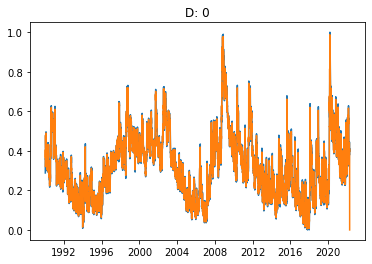

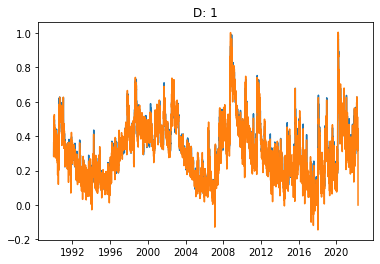

In [35]:
import statsmodels.api



for cd in range(2):

    m = statsmodels.api.tsa.statespace.SARIMAX(
                                                    endog = df_min_max_scaled,
                                                    order = (1,1,1),
                                                    seasonal_order = (0,cd,0,12),
                                                    trend = 'n'
                                               ).fit()


    plt.plot(df_min_max_scaled)
    plt.plot(m.fittedvalues)
    plt.title('D: ' + str(cd))
    plt.show()

In [36]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Last Price   No. Observations:                 8136
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood               14309.273
Date:                             Fri, 17 Jun 2022   AIC                         -28612.546
Time:                                     10:04:29   BIC                         -28591.539
Sample:                                          0   HQIC                        -28605.361
                                            - 8136                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8555      0.004    227.360      0.000       0.848       0.863
ma.L1         -1.0000      0.151     -6.620      0.000      -1.296      -0.704
sigma2         0.0017      0.000      6.562      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              3468.50
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
#print(df_min_max_scaled.shape)
#train=df_min_max_scaled.iloc[:-30]
#test=df_min_max_scaled.iloc[-30:]
#print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA
#model=ARIMA(train,order=(1,0,5))
#model=model.fit()
#model.summary()

In [ ]:
#data = model.fittedvalues

#data

In [ ]:
#plt.plot(df_min_max_scaled)
#plt.plot(model.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((model.fittedvalues-df_min_max_scaled)**2))

In [ ]:
#predictions_ARIMA_diff = pd.Series(model.fittedvalues)
#print (predictions_ARIMA_diff)

In [ ]:
#Convert to cumulative sum

#predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#print (predictions_ARIMA_diff_cumsum)

In [ ]:
#predictions_ARIMA_log = pd.Series(df_min_max_scaled, index=df_min_max_scaled.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum)
#predictions_ARIMA_log.plot()

In [ ]:
#start=len(train) 
#end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start=start,end=end)
#pred=model.predict(start=start,end=end ).rename('ARIMA predictions')

In [ ]:
#pred.head()

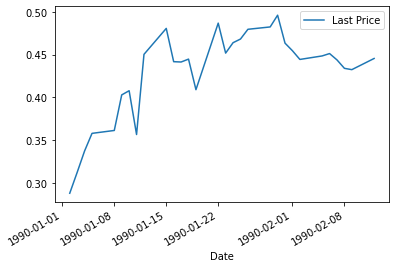

In [37]:
test.plot(legend=True)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
mse = metrics.mean_squared_error(pred, test)
print(rmse)
print (mse)

0.05168351378326319
0.002671185596984756


LSTM

In [ ]:
final_data = pd.DataFrame(data, columns=['Price']) #making dataframe from predicted values

In [ ]:
final_data #print dataset

,Price
Date,
2022-04-20,0.315159
2022-04-19,0.380511
2022-04-18,0.384087
2022-04-14,0.399271
2022-04-13,0.409386
...,...
1990-02-20,0.431740
1990-02-16,0.413379
1990-02-15,0.376839


In [ ]:
# split into train and test sets 70:30 ratio
train_set = int(len(final_data) * 0.7)
test_set = len(final_data) - train_set
train = final_data[test_set:len(final_data)]
test = final_data[train_set:len(final_data)]
print(len(train), len(test))

5674 2432


In [ ]:
train.values

array([[0.23005943],
       [0.20045253],
       [0.18270798],
       ...,
       [0.37683929],
       [0.35352126],
       [0.39811032]])

In [ ]:
test.shape

(2432, 1)

In [ ]:
print(index_future_dates)

DatetimeIndex(['1970-01-01 00:00:00.000008106'], dtype='datetime64[ns]', freq='D')


In [ ]:
#VIX_daily.shape[0]

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

training_set = final_data.iloc[:].values
X_train = []
y_train = []

for i in range(100, final_data.shape[0]):
    X_train.append(training_set[i-100:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)    
print(X_train), print(y_train), print()

[[0.31515895 0.38051141 0.3840873  ... 0.54131539 0.48936435 0.42421103]
 [0.38051141 0.3840873  0.3992709  ... 0.48936435 0.42421103 0.51128834]
 [0.3840873  0.3992709  0.40938596 ... 0.42421103 0.51128834 0.33794337]
 ...
 [0.28658207 0.27649507 0.28062648 ... 0.40825051 0.43174032 0.41337938]
 [0.27649507 0.28062648 0.27414475 ... 0.43174032 0.41337938 0.37683929]
 [0.28062648 0.27414475 0.26809768 ... 0.41337938 0.37683929 0.35352126]]
[0.51128834 0.33794337 0.35321935 ... 0.37683929 0.35352126 0.39811032]



(None, None, None)

In [ ]:
len(y_train), len(X_train)

(8006, 8006)

In [ ]:
test.iloc[:].values

array([[0.44120869],
       [0.45094236],
       [0.45881123],
       ...,
       [0.37683929],
       [0.35352126],
       [0.39811032]])

In [ ]:
#making test set
testing_set = test.iloc[:].values
X_test = []
y_test = []

for i in range(100, final_data.shape[0]):
    X_test.append(testing_set[i-100:i,0])
    y_test.append(testing_set[i,0])
    if i <=100:
      print(X_test)
      print(y_test)
      print()




[array([0.44120869, 0.45094236, 0.45881123, 0.47661914, 0.47143023,
       0.47705579, 0.49823087, 0.50038997, 0.46059355, 0.46685232,
       0.44041356, 0.42842235, 0.45931729, 0.44812725, 0.43479122,
       0.41757827, 0.40176817, 0.419222  , 0.43296804, 0.42654144,
       0.38061796, 0.44259251, 0.41656551, 0.44386631, 0.44507232,
       0.39733352, 0.3849645 , 0.37893847, 0.40671506, 0.40911338,
       0.41550272, 0.43957647, 0.42213631, 0.39327954, 0.41756   ,
       0.40495845, 0.45239177, 0.45783264, 0.50516468, 0.49476215,
       0.48036336, 0.48675083, 0.49397061, 0.47838093, 0.46704161,
       0.45093781, 0.44888782, 0.41981914, 0.42526728, 0.453637  ,
       0.42636729, 0.42060852, 0.38991024, 0.3962043 , 0.34163711,
       0.30317365, 0.32845817, 0.35006819, 0.35515039, 0.34854953,
       0.30953056, 0.35777963, 0.36099639, 0.36992648, 0.32592181,
       0.34700869, 0.37562593, 0.40404509, 0.4064543 , 0.39037563,
       0.41443124, 0.38422909, 0.39211591, 0.39331827, 0.3930

IndexError: ignored

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
len(y_test), len(X_test)

(2332, 2333)

In [ ]:
#X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#Reshape the data
#X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
#X_train.shape

In [ ]:
X_train, y_train

(array([[0.31515895, 0.38051141, 0.3840873 , ..., 0.54131539, 0.48936435,
         0.42421103],
        [0.38051141, 0.3840873 , 0.3992709 , ..., 0.48936435, 0.42421103,
         0.51128834],
        [0.3840873 , 0.3992709 , 0.40938596, ..., 0.42421103, 0.51128834,
         0.33794337],
        ...,
        [0.28658207, 0.27649507, 0.28062648, ..., 0.40825051, 0.43174032,
         0.41337938],
        [0.27649507, 0.28062648, 0.27414475, ..., 0.43174032, 0.41337938,
         0.37683929],
        [0.28062648, 0.27414475, 0.26809768, ..., 0.41337938, 0.37683929,
         0.35352126]]),
 array([0.51128834, 0.33794337, 0.35321935, ..., 0.37683929, 0.35352126,
        0.39811032]))

In [ ]:
X_train.shape, X_train.size

((8006, 100), 800600)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(1, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.add(Dropout(0.1))
model.add(Dense(units=1))
#Model compile
model.compile(loss='mean_squared_error', optimizer='adam')
# fit on train data
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

8006/8006 - 41s - loss: 0.0049 - 41s/epoch - 5ms/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 12        
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# make predictions
Predict = model.predict(test)

In [ ]:
import math
# calculate root mean squared error
Score = math.sqrt(mean_squared_error(test, Predict))
print('Train Score: %.2f RMSE' % (Score))

Train Score: 0.09 RMSE


In [ ]:
print('MAPE:',mean_absolute_percentage_error(test, Predict))

MAPE: 0.3201853026841511


In [ ]:
print('MAE:', MAE(test, Predict))

MAE: 0.07367896639872487


RF

In [ ]:
#define model
rf= RandomForestRegressor(n_estimators=30, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf.get_params() #get model parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 2,
 'warm_start': False}

In [ ]:
#X_train, X_train.shape

In [ ]:
#y_train, y_train.shape

In [ ]:
#Reshape the data
#dimX1, dimX2, dimX3 = np.array(X_train).shape
#X_train = np.reshape(np.array(X_train), (dimX1*dimX3, dimX2))
#X_train = X_train.reshape(X_train.shape[1:])
#X_train = X_train.transpose()
#X_train.shape

In [ ]:
#X_train

In [ ]:
#X_train = X_train.reshape(X_train.shape[1:])
#X_train = X_train.transpose()

In [ ]:
#X_train

In [ ]:

#dimy1, dimy2, dimy3 = np.array(y_train).shape
#y_train = np.reshape(np.array(y_train),  (dimy1*dimy2, dimy3 ))

In [ ]:
#print(X_train.shape, y_train.shape)

In [ ]:
rf = rf.fit(X_train, y_train) #fit on train data

building tree 1 of 30building tree 2 of 30



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.2s finished


In [ ]:
rf.score(X_train, y_train) #print the accuracy of train data

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.9953545632315408

In [ ]:
rf.score(X_test[:2332], y_test[:2332])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


0.9954509965338493

In [ ]:
predicted= rf.predict(X_test)

predicted

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


array([0.4705416 , 0.47291663, 0.47294849, ..., 0.36080107, 0.38266033,
       0.40499477])

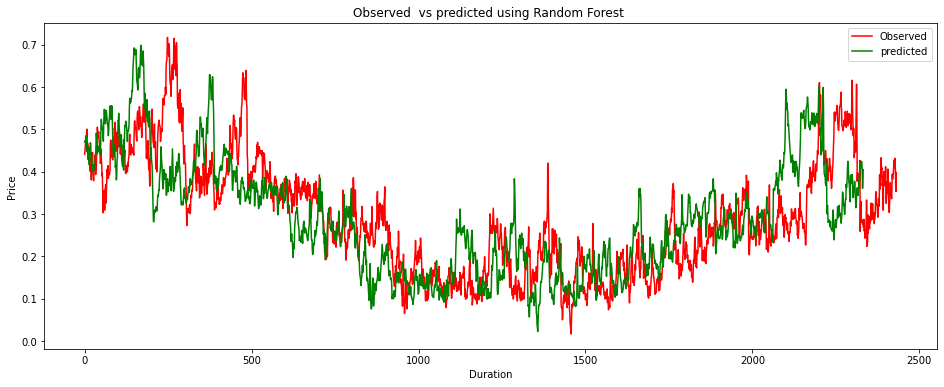

In [ ]:
# Visualising the results
plt.figure(figsize=(16,6))
plt.plot(test.values, color = 'red', label = 'Observed')
plt.plot(predicted, color = 'green', label = 'predicted')
plt.title('Observed  vs predicted using Random Forest ')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.legend()
plt.show()

SVM

In [ ]:
svr_linear = SVR(kernel='linear',C=0.5, gamma=5, epsilon=0.01) #define model and parameters
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
SVM = GridSearchCV(svr_linear, parameters) #grid searcg

In [ ]:
## overview of parameters

SVM.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': SVR(C=0.5, epsilon=0.01, gamma=5, kernel='linear'),
 'estimator__C': 0.5,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.01,
 'estimator__gamma': 5,
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'n_jobs': None,
 'param_grid': {'C': [1, 10], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
# Fitting the mmodel on train data

SVM.fit(X_train,y_train).predict(X_train)

array([0.42923167, 0.5061007 , 0.34105962, ..., 0.40898406, 0.37852711,
       0.3570705 ])

In [ ]:
SVM.score(X_train, y_train)

0.9707038787572709

In [ ]:
SVM.score(X_test[:2332], y_test[:2332])

0.970273880464027

In [ ]:
# Making predictions

predicted_SVM = SVM.predict(X_train)

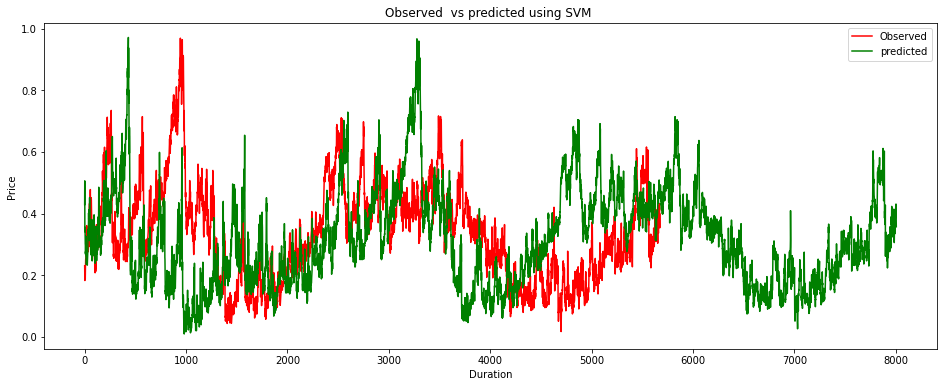

In [ ]:
# Visualising the results
plt.figure(figsize=(16,6))
plt.plot(train.values, color = 'red', label = 'Observed')
plt.plot(predicted_SVM, color = 'green', label = 'predicted')
plt.title('Observed  vs predicted using SVM ')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.legend()
plt.show()

SVM Model with RBF Kernel

In [ ]:
# SVM Model with RBF Kernel 
clf = SVR(kernel='rbf') 
clf.fit(X_train, y_train) 

SVR()

In [ ]:
y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(clf.score(X_train, y_train)))

Accuracy Score: 0.9379


CNN as descriminator

In [ ]:
# Reshaping the dimension of X varaible from 100 to 10*10
x_train =  X_train.reshape(len(X_train), 10*10).astype('float32') 
x_test =  X_test.reshape(len(X_test), 10*10).astype('float32') 

x_train /= 255
x_test /= 255

In [ ]:
# Data is currently flattened, we need to reshape it back to 10 * 10. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 10, 10])

x_test = np.reshape(x_test, [-1, 10, 10])

In [ ]:
# model_2 requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (11,11), (11, 11)), 'constant')

x_test=np.pad(x_test, ((0,0), (11,11), (11, 11)), 'constant')

In [ ]:
x_train.shape #print data shape

x_test.shape

(2333, 32, 32)

In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])

x_test = np.reshape(x_test, [-1, 32, 32, 1])

In [ ]:
# convert class labels to one-hot vectors
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)

In [ ]:
y_test.shape, y_train.shape

((2332,), (8006, 10))

In [ ]:
x_test.shape, x_train.shape

((2333, 32, 32, 1), (8006, 32, 32, 1))

In [ ]:
from keras.layers.convolutional import Conv1D   
from keras.layers import Dense, Activation, Flatten

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(32,32,1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 32, 31, 64)        192       
                                                                 
 flatten (Flatten)           (None, 63488)             0         
                                                                 
 dense_2 (Dense)             (None, 50)                3174450   
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,174,693
Trainable params: 3,174,693
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_test.shape, y_test.shape

((2333, 32, 32, 1), (2332,))

In [ ]:
#y_test=y_test.reshape(1,-1)
y_test = np.array(y_test)
y_test=y_test.reshape(-1,1)


In [ ]:
#y_test = np.array(y_test)
#y_test = np.array([2332, 1, 0])
#y_test = y_test.reshape(-1, 1)
#y_test.shape

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
#x_test = np.stack(x_test, axis = 0)
import tensorflow as tf

y_test = tf.expand_dims(y_test, 1)

Epoch 1/5
63/63 - 8s - loss: 0.0906 - accuracy: 0.9000 - 8s/epoch - 129ms/step
Epoch 2/5
63/63 - 0s - loss: 0.0900 - accuracy: 0.9000 - 354ms/epoch - 6ms/step
Epoch 3/5
63/63 - 0s - loss: 0.0900 - accuracy: 0.9000 - 350ms/epoch - 6ms/step
Epoch 4/5
63/63 - 0s - loss: 0.0900 - accuracy: 0.9000 - 353ms/epoch - 6ms/step
Epoch 5/5
63/63 - 0s - loss: 0.0900 - accuracy: 0.9000 - 359ms/epoch - 6ms/step
dict_keys(['loss', 'accuracy'])


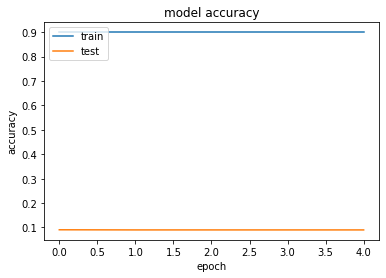

In [ ]:
from keras.metrics import accuracy
# fit model

batch_size = 128  # mini-batch with 128 examples
epochs = 5
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=2,
    validation_steps=(x_test, y_test))
history_dict = history.history
#accuracy = history_dict['accuracy']
#val_accuracy = history_dict['val_accuracy']
#loss = history_dict['loss']
#val_loss = history_dict['val_loss']                 
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
yhat = model.predict(x_test, verbose=1)

73/73 [==============================] - 0s 2ms/step


In [ ]:
yhat, yhat.shape

(array([[0.10039406],
        [0.10039597],
        [0.10039565],
        ...,
        [0.10015096],
        [0.10014968],
        [0.10014838]], dtype=float32), (2333, 1))

In [ ]:
# calculate root mean squared error
Score = math.sqrt(mean_squared_error(final_data[:2333], yhat))
print('Train Score: %.2f RMSE' % (Score))

Train Score: 0.22 RMSE


In [ ]:
print('MAPE:',mean_absolute_percentage_error(final_data[:2333], yhat))

MAPE: 0.6078727106804107


In [ ]:
print('MAE:', MAE(final_data[:2333], yhat))

MAE: 0.16820131081359307


In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model.evaluate(x_test[:2332], y_test, verbose=0)
print('Test loss:', score)

Test loss: [0.05301300436258316, 0.0]


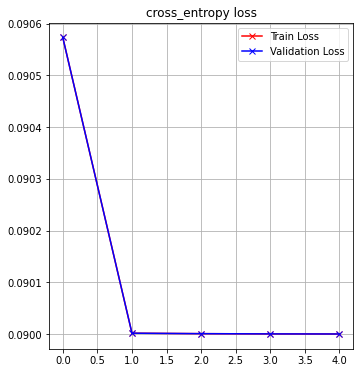

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)
    
plot_loss_accuracy(history)

GAN

In [65]:

training_set = df.iloc[:].values
X_train = []
y_train = []
for i in range(100, df.shape[0]):
  X_train.append(training_set[i-100:i,0])
  y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [66]:
#split into train and test sets
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train = df[test_size:len(df)]
test = df[train_size:len(df)]
print(len(train), len(test))
              

5695 2441


In [67]:
testing_set = test.iloc[:].values
X_test = []
y_test = []
for i in range(100, df.shape[0]):
  X_test.append(training_set[i-100:i, 0])
  y_test.append(training_set[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [68]:
x_train =  X_train.reshape(len(X_train), 10*10).astype('float32') 
x_test =  X_test.reshape(len(X_test), 10*10).astype('float32') 

In [69]:
x_train /= 255
x_test /= 255

In [70]:
# Data is currently flattened, we need to reshape it back to 10 * 10. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 10, 10])

x_test = np.reshape(x_test, [-1, 10, 10])

In [71]:
# model_2 requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (11,11), (11, 11)), 'constant')

x_test=np.pad(x_test, ((0,0), (11,11), (11, 11)), 'constant')

In [72]:
x_train.shape

x_test.shape

(8036, 32, 32)

In [73]:
X_train = x_train

X_test = x_test

In [74]:
from numpy import zeros, ones, expand_dims, asarray
from numpy.random import randn, randint
from keras.datasets import fashion_mnist
from keras.optimizer_v2 import adam
from keras.models import Model, load_model
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Conv2D, Conv2DTranspose, Concatenate
from keras.layers import LeakyReLU, Dropout, Embedding
from keras.layers import BatchNormalization, Activation
from keras import initializers
from keras.initializers import RandomNormal
from keras.optimizers import adam_v2
from matplotlib import pyplot
import numpy as np
from math import sqrt

In [75]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)  
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [76]:
def generate_real_samples(X_train, n_samples):
    ix = randint(0, X_train.shape[0], n_samples) 
    X = X_train[ix]  
    y = ones((n_samples, 1)) 
    return X, y

In [ ]:
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(z_input)  
    y = zeros((n_samples, 1))
    return images, y

In [77]:
def summarize_performance(step, g_model, latent_dim, n_samples=100):
    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    X = (X + 1) / 2.0
    for i in range(100):
        pyplot.subplot(10, 10, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
    filename2 = 'model_%04d.h5' % (step+1)
    g_model.save('model_18740.h5')
    print('>Saved: %s' % (filename2))

In [78]:
def save_plot(examples, n_examples):
    for i in range(n_examples):
        pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)
        pyplot.axis('off')
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()

In [79]:
def define_discriminator(in_shape=(32,32,1)):
    init = RandomNormal(stddev=0.02)  
    in_image = Input(shape=in_shape)
    fe = Flatten()(in_image)
    fe = Dense(1024)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.3)(fe)
    fe = Dense(512)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.3)(fe)
    fe = Dense(256)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dropout(0.3)(fe)
    out = Dense(1, activation='sigmoid')(fe)
    model = Model(in_image, out)
    opt =  adam_v2.Adam(lr=0.0002, beta_1=0.5) 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [80]:
discriminator = define_discriminator()

In [81]:
def define_generator(latent_dim): 
    init = RandomNormal(stddev=0.02)
    in_lat = Input(shape=(latent_dim,)) 
    gen = Dense(256, kernel_initializer=init)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(512, kernel_initializer=init)(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(1024, kernel_initializer=init)(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(32 * 32 * 1, kernel_initializer=init)(gen)
    out_layer = Activation('tanh')(gen)
    out_layer = Reshape((32, 32, 1))(gen)
    model = Model(in_lat, out_layer)
    opt =  adam_v2.Adam(lr=0.0002, beta_1=0.5) 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [82]:
generator = define_generator(100)

In [83]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    gan_output = d_model(g_model.output)
    model = Model(g_model.input, gan_output)
    opt =  adam_v2.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [84]:
gan_model = define_gan(generator, discriminator)

In [85]:
def train(g_model, d_model, gan_model, X_train, latent_dim, n_epochs=100, n_batch=64):
    bat_per_epo = int(X_train.shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    for i in range(n_steps):
        X_real, y_real = generate_real_samples(X_train, n_batch)
        d_loss_r, d_acc_r = d_model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)
        d_loss_f, d_acc_f = d_model.train_on_batch(X_fake, y_fake)
        z_input = generate_latent_points(latent_dim, n_batch) 
        y_gan = ones((n_batch, 1)) 
        g_loss, g_acc = gan_model.train_on_batch(z_input, y_gan)
        print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_loss_r,d_acc_r, d_loss_f,d_acc_f, g_loss,g_acc))
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, latent_dim)

>1, dr[0.678,0.938], df[0.701,0.016], g[0.692,0.688]
>2, dr[0.637,1.000], df[0.706,0.000], g[0.689,0.859]
>3, dr[0.601,1.000], df[0.712,0.000], g[0.684,0.984]
>4, dr[0.557,1.000], df[0.720,0.000], g[0.681,0.969]
>5, dr[0.509,1.000], df[0.729,0.000], g[0.679,0.953]
>6, dr[0.465,1.000], df[0.743,0.000], g[0.672,1.000]
>7, dr[0.431,1.000], df[0.765,0.000], g[0.667,1.000]
>8, dr[0.387,1.000], df[0.787,0.000], g[0.654,1.000]
>9, dr[0.344,1.000], df[0.839,0.000], g[0.628,1.000]
>10, dr[0.339,1.000], df[0.932,0.000], g[0.601,1.000]
>11, dr[0.318,1.000], df[1.003,0.000], g[0.573,1.000]
>12, dr[0.356,1.000], df[1.054,0.000], g[0.565,1.000]
>13, dr[0.367,1.000], df[1.130,0.000], g[0.596,1.000]
>14, dr[0.429,1.000], df[1.066,0.000], g[0.644,0.875]
>15, dr[0.477,1.000], df[1.015,0.000], g[0.726,0.250]
>16, dr[0.538,1.000], df[0.920,0.000], g[0.813,0.000]
>17, dr[0.602,1.000], df[0.829,0.016], g[0.887,0.000]
>18, dr[0.657,0.781], df[0.776,0.156], g[0.945,0.000]
>19, dr[0.708,0.234], df[0.733,0.281]

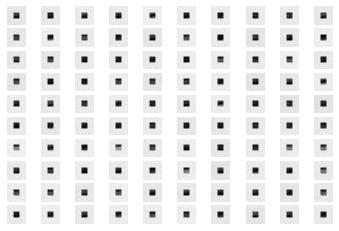

In [86]:
latent_dim = 100
train(generator, discriminator, gan_model, X_train, latent_dim, n_epochs=20, n_batch=64)

The first column reports the iteration loss and iteration number, the second the classification loss and accuracy of the discriminator for real examples (data set), and the third column the classification loss and accuracy of the discriminator for generated (fake) examples.

In [ ]:
# demonstrate creating the three models in the gan
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 1024)              0   

In [ ]:
model = load_model('model_18740.h5', compile=False)
latent_dim = 100
n_examples = 100
latent_points = generate_latent_points(latent_dim, n_examples)
X  = model.predict(latent_points)
X = (X + 1) / 2.0

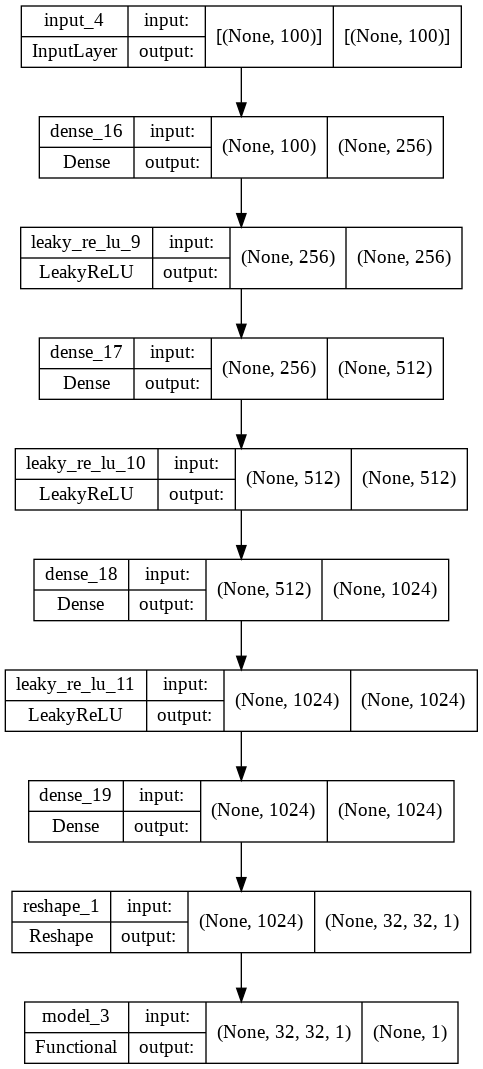

In [ ]:
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

GAN

In [39]:
# split into train and test sets
train_size = int(len(final_data) * 0.7)
test_size = len(final_data) - train_size
train = final_data[test_size:len(final_data)]
test = final_data[train_size:len(final_data)]
print(len(train), len(test))

5674 2432


In [40]:
## making the training data out of orignial dataframe


training_set = train.iloc[:].values
X_train = []
y_train = []
for i in range(100, training_set.shape[0]):
    X_train.append(training_set[i-100:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
print(X_train.shape)
print(y_train.shape)

(5574, 100)
(5574,)


In [42]:
## making the testing data out of orignial dataframe

testing_set = test.iloc[:].values
X_test = []
y_test = []
for i in range(100, testing_set.shape[0]):
    X_test.append(testing_set[i-100:i,0])
    y_test.append(testing_set[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [43]:
print(X_test.shape)
print(y_test.shape)

(2332, 100)
(2332,)


In [44]:
## Reshaping the demension of X varaible from 100 to 10*10


x_train =  X_train.reshape(len(X_train), 10*10).astype('float32') 
x_test =  X_test.reshape(len(X_test), 10*10).astype('float32') 

x_train /= 255
x_test /= 255

In [45]:
# Data is currently flattened, we need to reshape it back to 10 * 10. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 10, 10])

x_test = np.reshape(x_test, [-1, 10, 10])

In [46]:
# GAN model requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (11,11), (11, 11)), 'constant')

x_test=np.pad(x_test, ((0,0), (11,11), (11, 11)), 'constant')

In [47]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])

x_test = np.reshape(x_test, [-1, 32, 32, 1])

In [48]:
## Assinging the varaibles 

X_train = x_train

X_test = x_test

In [49]:
## Overview

print(X_train.shape)
print(X_test.shape)

(5574, 32, 32, 1)
(2332, 32, 32, 1)


In [50]:
# convert class labels to one-hot vectors
num_classes = 15
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)

In [51]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)  
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

In [52]:
def generate_real_samples(X_train, n_samples):
    ix = randint(0, X_train.shape[0], n_samples) 
    X = X_train[ix]  
    y = ones((n_samples, 1)) 
    return X, y

In [53]:
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(z_input)  
    y = zeros((n_samples, 1))
    return images, y

In [54]:
def summarize_performance(step, g_model, latent_dim, n_samples=100):
    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    X = (X + 1) / 2.0
    for i in range(100):
        pyplot.subplot(10, 10, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
    filename2 = 'model_%04d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s' % (filename2))

In [55]:
def save_plot(examples, n_examples):
    for i in range(n_examples):
        pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)
        pyplot.axis('off')
        pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()

In [56]:
def define_discriminator(in_shape=(32, 32, 1)):
    init = RandomNormal(stddev=0.02)  
    in_image = Input(shape=in_shape)
    
    # define model
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    #model = Model(in_image, out)
    opt =  adam_v2.Adam(lr=0.0002, beta_1=0.5) 
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [57]:
discriminator = define_discriminator()

In [58]:
def define_generator(latent_dim):
    init = RandomNormal(stddev=0.02)
    in_lat = Input(shape=(latent_dim,)) 
    gen = TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(32, 32, 1)))
    gen = TimeDistributed(MaxPooling1D(2))
    gen = TimeDistributed(Conv1D(128, kernel_size=3, activation='relu'))
    gen = TimeDistributed(MaxPooling1D(2))
    gen = TimeDistributed(Conv1D(64, kernel_size=3, activation='relu'))
    gen = TimeDistributed(MaxPooling1D(2))
    # LSTM LAYERS
    gen = Bidirectional(LSTM(100, return_sequences=True))
    gen = Dropout(0.5)
    gen = Bidirectional(LSTM(100, return_sequences=False))
    gen = Dropout(0.5)
    gen = Dense(256, kernel_initializer=init)(in_lat)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(512, kernel_initializer=init)(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(1024, kernel_initializer=init)(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(32 * 32 * 1, kernel_initializer=init)(gen)
    
    #Final layers
    out_layer = Activation('tanh')(gen)
    out_layer = Reshape((32, 32, 1))(gen)
    model = Model(in_lat, out_layer)
    opt = adam_v2.Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [59]:
generator = define_generator(100)

In [60]:
def define_gan(g_model, d_model):
    d_model.trainable = False
    gan_output = d_model(g_model.output)
    model = Model(g_model.input, gan_output)
    opt = adam_v2.Adam(lr=0.0001, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [61]:
gan_model = define_gan(generator, discriminator)

In [62]:
def train(g_model, d_model, gan_model, X_train, latent_dim, n_epochs=10, n_batch=128):
    bat_per_epo = int(X_train.shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    for i in range(n_steps):
        X_real, y_real = generate_real_samples(X_train, n_batch)
        d_loss_r, d_acc_r = d_model.train_on_batch(X_train, y_train)
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_batch)
        d_loss_f, d_acc_f = d_model.train_on_batch(X_fake, y_fake)
        z_input = generate_latent_points(latent_dim, n_batch) 
        y_gan = ones((n_batch, 1)) 
        g_loss, g_acc = gan_model.train_on_batch(z_input, y_gan)
        print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]' % (i+1, d_loss_r,d_acc_r, d_loss_f,d_acc_f, g_loss,g_acc))
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, latent_dim)

>1, dr[1.028,0.933], df[0.000,1.000], g[15.313,0.000]
>2, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>3, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>4, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>5, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>6, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>7, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>8, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>9, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>10, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>11, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>12, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>13, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>14, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>15, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>16, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>17, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>18, dr[1.028,0.933], df[0.000,1.000], g[15.425,0.000]
>19, dr[1.028,0.933

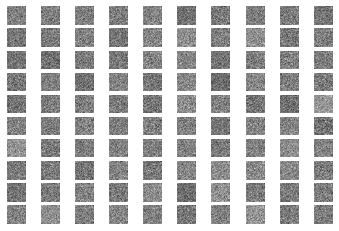

In [63]:
latent_dim = 100
train(generator, discriminator, gan_model, X_train, latent_dim, n_epochs=20, n_batch=64)

In [74]:
model = load_model('model_1740.h5')
latent_dim = 100
n_examples = 5574
latent_points = generate_latent_points(latent_dim, n_examples)
X  = model.predict(latent_points)
X = (X + 1) / 2.0

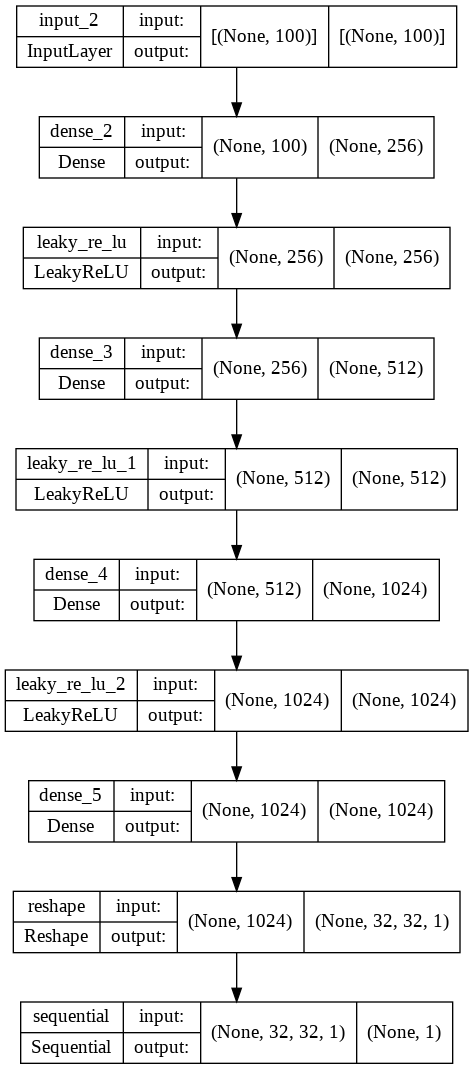

In [75]:
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [76]:
X.shape

(5574, 32, 32, 1)

In [77]:
# split into train and test sets
train_size = int(len(final_data) * 0.7)
test_size = len(final_data) - train_size
train = final_data[test_size:len(final_data)]
test = final_data[train_size:len(final_data)]
print(len(train), len(test))

## making the training data out of orignial dataframe


training_set = train.iloc[:].values
X_train = []
y_train = []
for i in range(100, training_set.shape[0]):
    X_train.append(training_set[i-100:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

## making the testing data out of orignial dataframe

testing_set = test.iloc[:].values
X_test = []
y_test = []
for i in range(100, testing_set.shape[0]):
    X_test.append(testing_set[i-100:i,0])
    y_test.append(testing_set[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

5674 2432


In [78]:
#Save the model for the future use(as it takes hours to be trained!)
model.save('alexnetfruit.h5') 

In [80]:
#Pick the first Fully-Connected layer as the features which will be of dimension (1 x 100)
layer_name = 'dense_5'
FC_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

In [81]:
#Find the Features for n number of train images and we will get n x 100
#This means we will get 100 features for each value.
i=0
features=np.zeros(shape=(X_train.shape[0],100))
for directory_path in glob.glob("Example/Trainexample1/*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = np.expand_dims(img, axis=0)
        FC_output = FC_layer_model.predict(img)
        features[i]=FC_output
        i+=1

In [82]:
#Save the features of the train images to use it in future.
np.save('features', features)

In [83]:
#Name the feature rows as f_0, f_1, f_2...
feature_col=[]
for i in range(100):
    feature_col.append("f_"+str(i))
    i+=1

In [84]:
#Create DataFrame with features and coloumn name
train_features=pd.DataFrame(data=X_train,columns=feature_col)
feature_col = np.array(feature_col)

train_class = list(np.unique(y_train))
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', y_train.shape)
train_class

Training Features Shape: (5574, 100)
Training Labels Shape: (5574,)


[0.01709856665018733,
 0.025676134995812894,
 0.03699770748422576,
 0.04249334545117267,
 0.043341725982426305,
 0.04362179492149315,
 0.045467840200709375,
 0.04753483873471903,
 0.04803131309489789,
 0.050088746698148945,
 0.05022577228309588,
 0.05047321812630867,
 0.05086270129304138,
 0.05110901982649896,
 0.052896618620721425,
 0.05304628852803289,
 0.053186642113213,
 0.054817441819496104,
 0.05642589264049541,
 0.05703777916287894,
 0.057094523321782775,
 0.05814202482498182,
 0.05864457062734868,
 0.05890167258749135,
 0.05908441955071253,
 0.059620316271240315,
 0.060560818584052434,
 0.060586026549595995,
 0.06100478393852787,
 0.061230906888154746,
 0.06125455791259454,
 0.06148888659265023,
 0.06296500862082327,
 0.06361326697687064,
 0.0644755967247948,
 0.06493804978515555,
 0.06518716560366142,
 0.06522211976468939,
 0.06540847862856206,
 0.06545647032436552,
 0.06611375932392471,
 0.06685978267987175,
 0.06696593574237189,
 0.06743519786992425,
 0.06970614353159812,
 0

RF

In [85]:
## Defing the MOdel

rf= RandomForestRegressor(n_estimators=30, verbose=2, random_state=42, n_jobs = -1)

In [86]:
## Printing the Model Parameters 

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 2,
 'warm_start': False}

In [87]:
y_test.shape

(2332,)

In [88]:
#Feed the extracted features with the labels to RANDOM FOREST 
 

rf.fit(train_features, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished


RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42, verbose=2)

In [89]:
#Find the Features from Alexnet's FC layer for n number of test images and we will get n x 100
i=0
features_test=np.zeros(shape=(y_test.shape[0],100))
for directory_path in glob.glob("Example/Validation-Example1//*"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)    
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = np.expand_dims(img, axis=0)
        FC_output = FC_layer_model.predict(img)
        features_test[i]=FC_output
        i+=1

In [90]:
#Create DataFrame with features and coloumn name
test_features=pd.DataFrame(data=features_test,columns=feature_col)
feature_col = np.array(feature_col)

print('Test Features Shape:', test_features.shape)
print('Test Labels Shape:', y_test.shape)

Test Features Shape: (2332, 100)
Test Labels Shape: (2332,)


In [91]:
#Feed the features of the test images to Random Forest Classifier to predict its class
predictions = rf.predict(test_features)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [92]:
features_test.shape

(2332, 100)

In [93]:
print('Random Forest Model score in Percentage:', rf.score(train_features, y_train)*100)

Random Forest Model score in Percentage: 99.62219432051623


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


In [94]:
print('MAPE:',mean_absolute_percentage_error(y_test, predictions))

MAPE: 0.7102289301202714


In [95]:
print('MAE:', MAE(y_test, predictions))

MAE: 0.2221807711420511


SVM

In [96]:
## defing the model and parameters
svr_linear = SVR(kernel='linear',C=0.5, gamma=5, epsilon=0.01)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
## Using Grid CV appraoch
SVM = GridSearchCV(svr_linear, parameters)

In [97]:
## overview of parameters
SVM.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': SVR(C=0.5, epsilon=0.01, gamma=5, kernel='linear'),
 'estimator__C': 0.5,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.01,
 'estimator__gamma': 5,
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'n_jobs': None,
 'param_grid': {'C': [1, 10], 'kernel': ('linear', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [98]:
## Fitting the mmodel on train data
SVM.fit(train_features,y_train)

GridSearchCV(estimator=SVR(C=0.5, epsilon=0.01, gamma=5, kernel='linear'),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [99]:
## Model score on train
SVM.score(train_features,y_train)

0.9768375360113315

In [100]:
### Making predictions
predicted_SVM = SVM.predict(train_features)

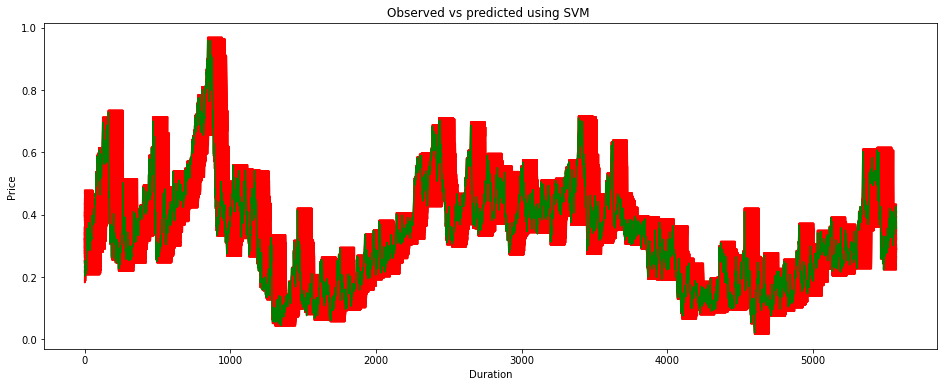

In [101]:
# Visualising the results
plt.figure(figsize=(16,6))
plt.plot(train_features, color = 'red')
plt.plot(predicted_SVM, color = 'green')
plt.title('Observed vs predicted using SVM ')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

In [102]:
print('MAPE:',mean_absolute_percentage_error(y_train, predicted_SVM))

MAPE: 0.06473369792423059


In [103]:
print('MAE:', MAE(y_train, predicted_SVM))

MAE: 0.017446355968457367
